In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df=pd.read_csv('movies_dataset_processed.csv')
df

Unnamed: 0  IMDb-rating appropriate_for                   director   
0              0          4.8               R                  John Swab  \
1              1          6.4           TV-PG                Paul Ziller   
2              2          5.2               R               Ben Wheatley   
3              3          6.5               R             Benjamin Caron   
4              4          6.9           PG-13                Ravi Kapoor   
...          ...          ...             ...                        ...   
9897        9897          7.1       Not Rated                  Biren Nag   
9898        9898          7.0               G               Guy Hamilton   
9899        9899          5.6               R  Barbara Topsøe-Rothenborg   
9900        9900          7.1       Not Rated                  Biren Nag   
9901        9901          7.0               G               Guy Hamilton   

     downloads  industry                      language posted_date   
0          304  Holywood                       English  2023-02-20  \
1           73  Holywood                       English  2023-02-20   
2        1,427  Holywood                 English,Hindi  2021-04-20   
3        1,781  Holywood                       English  2023-02-13   
4          458  Holywood                       English  2023-02-18   
...        ...       ...                           ...         ...   
9897     1,932  Bolywood                         Hindi  1970-01-01   
9898     2,544  Holywood  English,German,Polish,French  1970-01-01   
9899    12,284  Holywood        Spanish,German,English  2016-05-26   
9900     1,932  Bolywood                         Hindi  1970-01-01   
9901     2,544  Holywood  English,German,Polish,French  1970-01-01   

     release_date  run_time   
0      2023-01-28       105  \
1      2023-02-05        84   
2      2021-06-18       107   
3      2023-02-17       116   
4      2022-12-02        80   
...           ...       ...   
9897   1962-05-11       158   
9898   1969-09-17       132   
9899   1970-01-01        90   
9900   1962-05-11       158   
9901   1969-09-17       132   

                                              storyline   
0     Doc\r\n facilitates a fragile truce between th...  \
1     Caterer\r\n Goldy Berry reunites with detectiv...   
2     As the world searches for a cure to a disastro...   
3     Motivations are suspect, and expectations are ...   
4     An\r\n unmotivated South Asian American rapper...   
...                                                 ...   
9897  After a lusty Thakur rapes a young girl, she k...   
9898  Historical reenactment of the air war in the e...   
9899  LOVE AT FIRST HICCUP is a charming, innocent, ...   
9900  After a lusty Thakur rapes a young girl, she k...   
9901  Historical reenactment of the air war in the e...   

                                           title   views   
0                                   Little Dixie   2,794  \
1     Grilling Season: A Curious Caterer Mystery   1,002   
2                                   In the Earth  14,419   
3                                        Sharper  18,225   
4                                   Four Samosas   6,912   
...                                          ...     ...   
9897                              Bees Saal Baad   6,076   
9898                           Battle of Britain   9,319   
9899                        Love at First Hiccup  36,022   
9900                              Bees Saal Baad   6,077   
9901                           Battle of Britain   9,320   

                                                 writer  days_to_post  bucket  
0                                             John Swab            23     6.0  
1                                John Christian Plummer            15     6.0  
2                                          Ben Wheatley            59     7.0  
3                     Brian Gatewood, Alessandro Tanaka             4     4.0  
4                                           Ravi 

In [2]:
release_year=[]
for date in df['release_date']:
    date_object=datetime.datetime.strptime(date,'%Y-%m-%d')
    release_year.append(date_object.year)
df['release_year']=release_year

In [3]:
df.drop(['Unnamed: 0','storyline','writer','title','language'],axis=1,inplace=True)
df

IMDb-rating appropriate_for                   director downloads   
0             4.8               R                  John Swab       304  \
1             6.4           TV-PG                Paul Ziller        73   
2             5.2               R               Ben Wheatley     1,427   
3             6.5               R             Benjamin Caron     1,781   
4             6.9           PG-13                Ravi Kapoor       458   
...           ...             ...                        ...       ...   
9897          7.1       Not Rated                  Biren Nag     1,932   
9898          7.0               G               Guy Hamilton     2,544   
9899          5.6               R  Barbara Topsøe-Rothenborg    12,284   
9900          7.1       Not Rated                  Biren Nag     1,932   
9901          7.0               G               Guy Hamilton     2,544   

      industry posted_date release_date  run_time   views  days_to_post   
0     Holywood  2023-02-20   2023-01-28       105   2,794            23  \
1     Holywood  2023-02-20   2023-02-05        84   1,002            15   
2     Holywood  2021-04-20   2021-06-18       107  14,419            59   
3     Holywood  2023-02-13   2023-02-17       116  18,225             4   
4     Holywood  2023-02-18   2022-12-02        80   6,912            78   
...        ...         ...          ...       ...     ...           ...   
9897  Bolywood  1970-01-01   1962-05-11       158   6,076          2792   
9898  Holywood  1970-01-01   1969-09-17       132   9,319           106   
9899  Holywood  2016-05-26   1970-01-01        90  36,022         16947   
9900  Bolywood  1970-01-01   1962-05-11       158   6,077          2792   
9901  Holywood  1970-01-01   1969-09-17       132   9,320           106   

      bucket  release_year  
0        6.0          2023  
1        6.0          2023  
2        7.0          2021  
3        4.0          2023  
4        7.0          2022  
...      ...           ...  
9897     9.0          1962  
9898     8.0          1969  
9899    10.0          1970  
9900     9.0          1962  
9901     8.0          1969  

[9902 rows x 12 columns]

In [4]:
# languages=set([])
# for i in df['language']:
#     d_lang=i.split(',')
#     for j in d_lang:
#         languages.add(j)
# languages

In [5]:
cols_to_label_enc=['appropriate_for','director','industry']
label_encs=[]
for col in cols_to_label_enc:
    enc=LabelEncoder()
    enc.fit(df[col].unique())
    df[col]=enc.transform(df[col])
    label_encs.append(enc)

In [6]:
cols_to_float=['downloads','views']
for col in cols_to_float:
    np_list=[]
    for i in range(df.shape[0]):
        np_list.append(int(str(df[col][i]).replace(',','')))
    df[col]=np_list
df

IMDb-rating  appropriate_for  director  downloads  industry posted_date   
0             4.8               10      2363        304         4  2023-02-20  \
1             6.4               15      3715         73         4  2023-02-20   
2             5.2               10       532       1427         4  2021-04-20   
3             6.5               10       540       1781         4  2023-02-13   
4             6.9                8      3946        458         4  2023-02-18   
...           ...              ...       ...        ...       ...         ...   
9897          7.1                6       594       1932         2  1970-01-01   
9898          7.0                3      1785       2544         4  1970-01-01   
9899          5.6               10       482      12284         4  2016-05-26   
9900          7.1                6       594       1932         2  1970-01-01   
9901          7.0                3      1785       2544         4  1970-01-01   

     release_date  run_time  views  days_to_post  bucket  release_year  
0      2023-01-28       105   2794            23     6.0          2023  
1      2023-02-05        84   1002            15     6.0          2023  
2      2021-06-18       107  14419            59     7.0          2021  
3      2023-02-17       116  18225             4     4.0          2023  
4      2022-12-02        80   6912            78     7.0          2022  
...           ...       ...    ...           ...     ...           ...  
9897   1962-05-11       158   6076          2792     9.0          1962  
9898   1969-09-17       132   9319           106     8.0          1969  
9899   1970-01-01        90  36022         16947    10.0          1970  
9900   1962-05-11       158   6077          2792     9.0          1962  
9901   1969-09-17       132   9320           106     8.0          1969  

[9902 rows x 12 columns]

In [7]:
df.shape

(9902, 12)

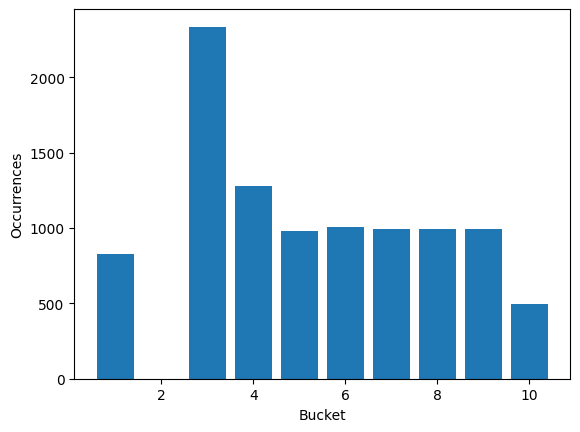

In [8]:
buckets=df['bucket'].unique()
counts=[]
for bucket in buckets:
    counts.append(df[df['bucket']==bucket].shape[0])
plt.bar(buckets,counts)
plt.xlabel('Bucket')
plt.ylabel('Occurrences')
plt.show()

In [9]:
# Downsample data
from sklearn.utils import resample
df_class3=df[df['bucket']==3]
df_not_class3=df[df['bucket']!=3]
df_class3=resample(df_class3,replace=True,n_samples=1100,random_state=47)
df=pd.concat([df_class3,df_not_class3])

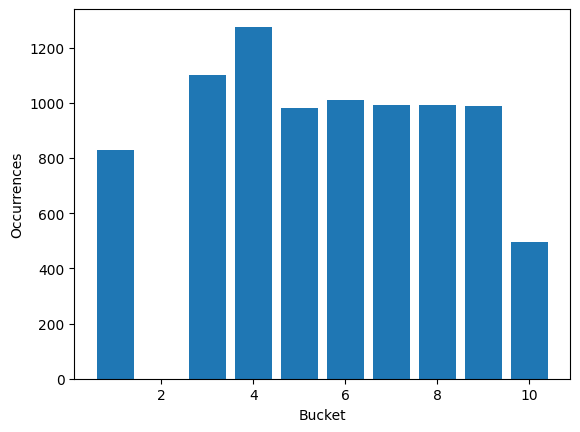

In [10]:
counts=[]
for bucket in buckets:
    counts.append(df[df['bucket']==bucket].shape[0])
plt.bar(buckets,counts)
plt.xlabel('Bucket')
plt.ylabel('Occurrences')
plt.show()

In [11]:
# df['buckets']
df.shape

(8667, 12)

In [12]:
X_cols=['IMDb-rating','appropriate_for','director','downloads','industry','run_time','views','release_year']
Y_cols=['bucket']
X_train, X_test, y_train, y_test = train_test_split(df[X_cols],df[Y_cols],test_size=0.001,random_state=38)

In [13]:
# X_train.reset_index(inplace=True,drop=True)
# y_train.reset_index(inplace=True,drop=True)
trainDF=pd.merge(X_train,y_train,left_index=True,right_index=True)
y_test.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_test=y_test.to_numpy()

In [14]:
import math
class KNN:
    def __init__(self,data,k=6):
        self.localDF=pd.DataFrame(data)
        self.k=k
        self.weights=[1/8,1/8,1/8,1/8,1/8,1/8,1/8,1/8]
#         self.localDF['bucket']=y_train
        
    def calc_distances(self,row,index):
        dist=0
#         df_row=self.localDF.take([index])
        i=0
        for col in X_cols:
            dist+=(row[col]-self.localDF[col][index])*(row[col]-self.localDF[col][index])*self.weights[i]
            i+=1
        return math.sqrt(dist)
    
    def predict(self,row):
        distances=[]
#         print(self.localDF)
#         print(self.localDF.size)
        for i in range(self.localDF.shape[0]):
            distances.append(self.calc_distances(row,i))
        self.localDF['distances']=distances
        self.localDF.sort_values('distances',inplace=True)
        firstDF=self.localDF.head(self.k)
        label=firstDF['bucket'].mode()[0]
        return label
    
    def predictAll(self,rows):
        predictions=[]
        for i in range(rows.shape[0]):
            predictions.append(self.predict(rows.take([i])))
#             if i%5==0:
#                 print(i/rows.shape[0]*100,"% complete")
#                 print(i,"Rows complete")
        return predictions            

In [15]:
import random
from statistics import mode
class Bagging:
    def __init__(self,num_models,trainDF):
        self.num_models=num_models
        self.models=[]
        self.df=trainDF
        
        
    def bootstrap_sampler(self,num_samples):
        bootDF=pd.DataFrame(columns=X_cols+Y_cols)
        rand_indices=[random.randint(0,self.df.shape[0]-1) for i in range(num_samples)]
        return self.df.take(rand_indices)
    
    def predict(self,row):
        for _ in range(self.num_models):
            data=self.bootstrap_sampler(300)
            data.reset_index(inplace=True)
            self.models.append(KNN(data))
        predictions=[]
        for model in self.models:
            predictions.append(model.predict(row))
        return mode(predictions)
    
    def predictAll(self,rows):
        predictions=[]
        for i in range(rows.shape[0]):
            predictions.append(self.predict(rows.take([i])))
        return predictions

In [16]:
bagging=Bagging(2,trainDF)
y_pred=bagging.predictAll(X_test)
count=0
for i in range(len(y_test)):
    if y_pred[i]==y_test[i]:
        count+=1
print(count/len(y_test))

/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


0.0


/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)
/var/folders/_6/11xyq8192n1gllqnqpqhh6000000gn/T/ipykernel_2515/2918230734.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.sqrt(dist)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train.values.ravel())
knn.score(X_test,y_test)

0.3333333333333333

In [18]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:
y_pred = knn.predict(X_test)

r2 = knn.score(X_test, y_test)
accuracy_score = knn.score(X_test,y_test)
print('R2 score:', r2)

R2 score: 0.045044247787610736
Accuracy Score: 0.045044247787610736
